# DA514 Project

**Assigned on**: March 10th, 2025

**Due**: March 24th, 2025

## Prediction for the  customer default on loan
You are supposed to develop a model that can generalize well to the training data so that we can make better predictions on the test data. The objective here is to predict those customers who will default on their loans. In this scenario, we have financial institutions that will lend money to their customers, and there are other micro-lenders that will fund a certain (usually a small one at that) portion of the total amount of money demanded by the customer. These amounts are given in the data sets provided. There are customers who repeatedly lended from these institutions as will be apparent from the customer identification row in the data files.

Variables used in the train and test data are described in the following table. You have two other data files that you can use as externnal data to improve your predictions if the data has information useful for your model(s). `macro_data.xlsx` gives you the monthly values for the inflation and interest (deposit, saving and lending) rates from the beginning of 2021 to the end of 2024. The annual unemployment rates are also given (`unemployment.xlsx`) for the years of 2021 through 2024.

You will notice that a customer ID can appear in multiple rows of the dataset, and for a given customer, a loan ID can also appear with different lender IDs. For example, we can have the same customer ID on three rows with the same loan ID on each but a different lender ID. This observation means that the loan is funded by three separate lenders.

The table below contains the attributes (features) used in the dataset and their explanations:

1. **processID**: Unique record identifier

2. **customerID**: Identifier for each customer

3. **loanID**: Identifier for the loan demanded by the customer

4. **MLid**: Identifier for the micro lender

5. **loan_category**: Type of the loan (many difeerent types such as personal, education, health, etc. are identified by a letter code)

6. **new_customer**: Indication whether customer is a first-time or a repeating borrower (1: new, 0: repeating)

7. **loan_amt**: The Total amount of loan demanded from the financial institution by the customer

8. **payback_amt**: Total amount the customer is to pay back to the financial institution (with interest added to principal)

9. **loan_release_date**: Date the loan is delivered to the customer

10. **loan_due_date**: Date the loan is due

11. **lender_loan_amt**: Part of the loan funded by the micro lender

12. **lender_paybck_amt**: Total amount the customer is to pay back to the micro lender (with interest added to principal)

13. **target**: Indicates whether cthe ustomer defaults on loan - 1: Default, 0: Non-default


### Data files
**1. `train-kaggle.xlsx`** (54923 instances, 12 features, 1 target) : Training data you'll use for selecting your best model.

**2. `test-kaggle.xlsx`** (13731 instances, 12 features) : Note that there is no `target` column in the test data. This file will be used to make the predicitons that will be uploaded to Kaggle.

**3. `macro_data.xlsx`** Economic indicators (inflation rates, interest rates etc.) for the years relevant to train/test data sets.

**4. `unemployment.xlsx`** Unemployment rates for the years relevant to train/test data sets.

### Performance metric
The evaluation metric for this hackathon is chosen as "**F1 score**".

### Notes, warnings, suggestions
1. Whatever pre-processing techniques you applied to your training ata, the same set of pre-processing techniques should be applied on the test/validaiton data set as well. 
2. There are no constraints on the solution to be implemented. You can try to solve the problem with any Machine Learning model. Be flexible in terms of the methods to be used and the techniques to be experimented with.
3. The initiative regarding feature engineering is entirely up to you.


### Hackathon guide
* You should create a Kaggle account if you haven't done so before. Your google account will be good enough to log into Kaggle. Please make sure that your Kaggle account is associated with your name/identity. Avoid using names such as "Crazy cat". You can use an alias that reflects your identity so that I know who you are.
* After logging into Kaggle, open the competition page through the link 
https://www.kaggle.com/competitions/da514-default-prediction.
* When you obtain the best-performing model, prepare a prediction file (for example, **`pred.csv`**) and upload it to Kaggle. The name of the file you use is not important, but the file format is crucial to avoid any errors (carefully review the next item).
* Remember, during the entire Hackathon, you are allowed to upload a total of 16 solutions.

### How will I prepare the prediction file that will be uploaded to Kaggle?
You need to upload your predictions generated using the test data to Kaggle as a .csv file (for example, **`pred.csv`**). It is crucial that your file be formatted as below to avoid any errors. The values in the following "Prediction" column are just random numbers.

Assuming you created a data frame called **dfpred** to record you predictions:

For every row in the dataset, submission files should contain 2 columns: ID and Target where 1 indicates a loan default.

Your submission file should look like this (numbers to show the format only):
<pre>
ID                        TARGET
PID_325674216984211456    1
PID_334894236123267345    0
...
</pre>

**How do I create pred.csv?**
```python
# dfpred: dataframe for your predictions containing "ID" and "Prediction" fields
# How to write to a csv file 
dfpred.to_csv('pred.csv', index=False)
```

Now you can upload your file to Kaggle.

### How does Kaggle evaluate your predictions?
You have the right to upload your predictions (pred.csv) to Kaggle 16 times in total until the deadline. This is how you can measure the performance of your model on unseen data (generalization performance). You can interpret the results of changes made to the model by tracking your performance on Kaggle public score board. The performances and rankings of your fellow classmates will also be visible here.

**Attention**: Your score in the **Public Leaderboard** section (Average Precision) on Kaggle is ranked based on the evaluation of only 40% of the test data. The final ranking of the Hackathon will only be determined when the remaining 60% of the test data is also added to the evaluation (this part is kept under the **Private Leaderboard** which is not visible to you). Therefore, remember that your **Public Leaderboard** scores will provide you with limited guidance. It is worth noting that those individuals ranking lower on the Public Leaderboard but achieving better generalization may rise in the final evaluation.

### What will you submit?
By the end of the deadline, you are asked to submit:
1. Your Python notebook file in .ipynb format with clear explanations of what you did (including your interpretations).
2. Your pred.csv file

Please remember to add your name to the title of the notebook you submitted to SUCourse. You will lose (yes, seriously):

1. 5 points if the notebook has no association with your name 
2. 5 points if your Kaggle account/alias doesn't reflect your identity 

#### Best of luck!

## ref links
* https://www.kaggle.com/code/tobby18/african-credit-scoring-challenge-zindi-final#Model-Development
* https://www.kaggle.com/code/n1ghtwalkr/african-credit-scoring-challenge-zindi
* https://medium.com/@uncle_teslim/loan-default-prediction-a-project-in-my-journey-as-a-ml-engineering-learner-14c6dd6e8121
* https://zindi.africa/competitions/african-credit-scoring-challenge/discussions/24855

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import f1_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.metrics import ConfusionMatrixDisplay

from imblearn.over_sampling import BorderlineSMOTE
from lightgbm import LGBMClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import optuna 
from scipy.stats import mode

In [2]:
train_df = pd.read_excel("train-kaggle.xlsx")
test_df = pd.read_excel("test-kaggle.xlsx")
macro_df = pd.read_excel("macro_data.xlsx")
unemployment_df = pd.read_excel("unemployment.xlsx")

In [3]:
display("Train", train_df.head(), train_df.shape)

'Train'

,processID,customerID,loanID,MLid,loan_category,loan_amt,payback_amt,loan_release_date,loan_due_date,new_customer,lender_loan_amt,lender_payback_amt,target
0,PID_372255238161278515,372255,238161,278515,AA,2849.0,2849.0,2022-07-28,2022-08-04,1,854.7,855,0
1,PID_375998298687278515,375998,298687,278515,AA,2808.0,2910.0,2022-10-24,2022-10-31,1,0.0,0,0
2,PID_371612263293278515,371612,263293,278515,AA,11100.0,11100.0,2022-09-05,2022-09-12,1,0.0,0,0
3,PID_365548260790278515,365548,260790,278515,AA,3028.0,3029.0,2022-09-01,2022-09-08,1,0.0,0,0
4,PID_372209280232263041,372209,280232,263041,CA,6446.0,6543.0,2022-09-27,2022-09-30,1,1718.0,1744,0


(54923, 13)

In [4]:
train_df.info() # data types and check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54923 entries, 0 to 54922
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   processID           54923 non-null  object 
 1   customerID          54923 non-null  int64  
 2   loanID              54923 non-null  int64  
 3   MLid                54923 non-null  int64  
 4   loan_category       54923 non-null  object 
 5   loan_amt            54923 non-null  float64
 6   payback_amt         54923 non-null  float64
 7   loan_release_date   54923 non-null  object 
 8   loan_due_date       54923 non-null  object 
 9   new_customer        54923 non-null  int64  
 10  lender_loan_amt     54923 non-null  float64
 11  lender_payback_amt  54923 non-null  int64  
 12  target              54923 non-null  int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 5.4+ MB


In [5]:
# the number of distinct loan categories
num_loan_categories = train_df["loan_category"].nunique()
num_loan_categories

21

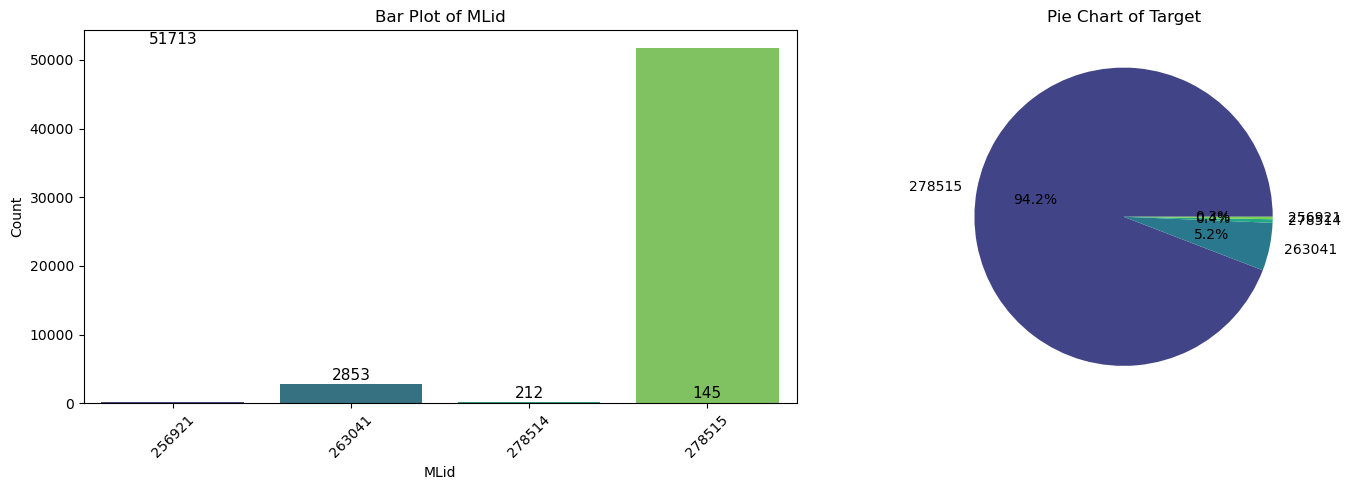

In [6]:
# lenders distribution
value_counts = train_df['MLid'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Bar plot
bars = sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax1, palette="viridis")
ax1.set_title('Bar Plot of MLid')
ax1.set_xlabel('MLid')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=45)

# Add count labels above each bar manually
for i, count in enumerate(value_counts.values):
    ax1.text(i, count + 100, str(count), ha='center', va='bottom', fontsize=11)

# Pie chart
ax2.pie(
    value_counts.values,
    labels=value_counts.index,
    autopct='%1.1f%%',
    colors=sns.color_palette("viridis", len(value_counts))
)
ax2.set_title('Pie Chart of Target')

plt.tight_layout()
plt.show()

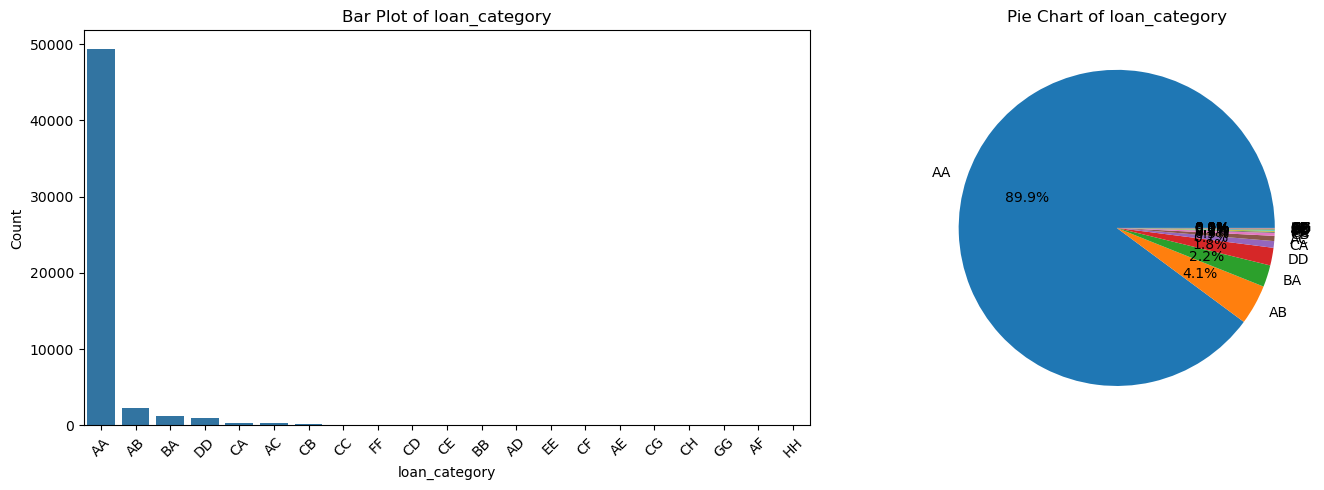

In [7]:
# loan category distribution
value_counts = train_df['loan_category'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax1)
ax1.set_title('Bar Plot of loan_category')
ax1.set_xlabel('loan_category')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=45)

ax2.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
ax2.set_title('Pie Chart of loan_category')

plt.tight_layout()
plt.show()

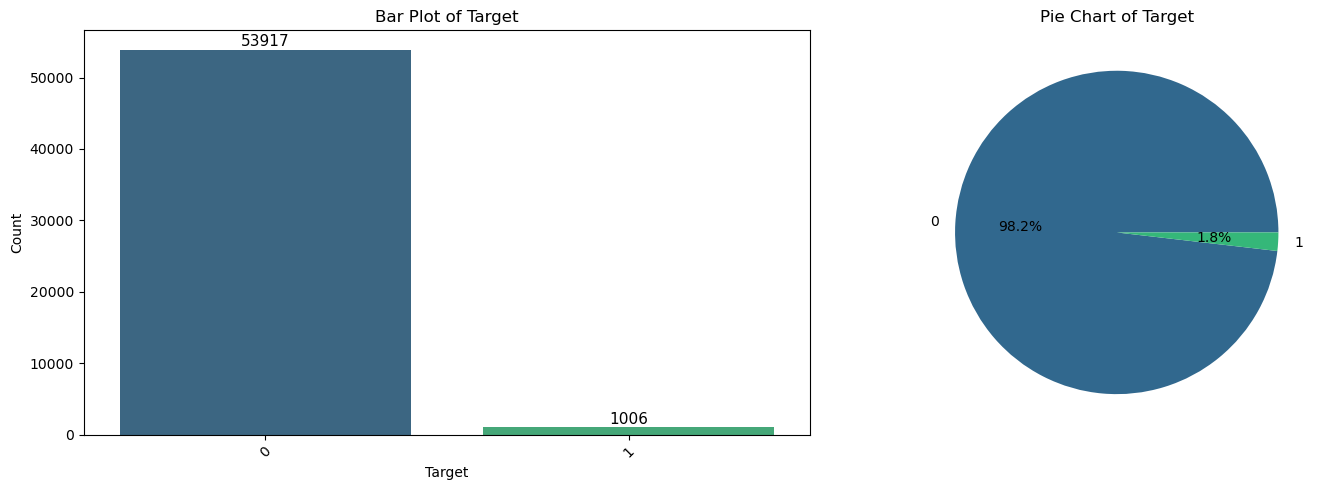

In [8]:
# target distribution
value_counts = train_df['target'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Bar plot
bars = sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax1, palette="viridis")
ax1.set_title('Bar Plot of Target')
ax1.set_xlabel('Target')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=45)

# Add count labels above each bar manually
for i, count in enumerate(value_counts.values):
    ax1.text(i, count + 100, str(count), ha='center', va='bottom', fontsize=11)

# Pie chart
ax2.pie(
    value_counts.values,
    labels=value_counts.index,
    autopct='%1.1f%%',
    colors=sns.color_palette("viridis", len(value_counts))
)
ax2.set_title('Pie Chart of Target')

plt.tight_layout()
plt.show()


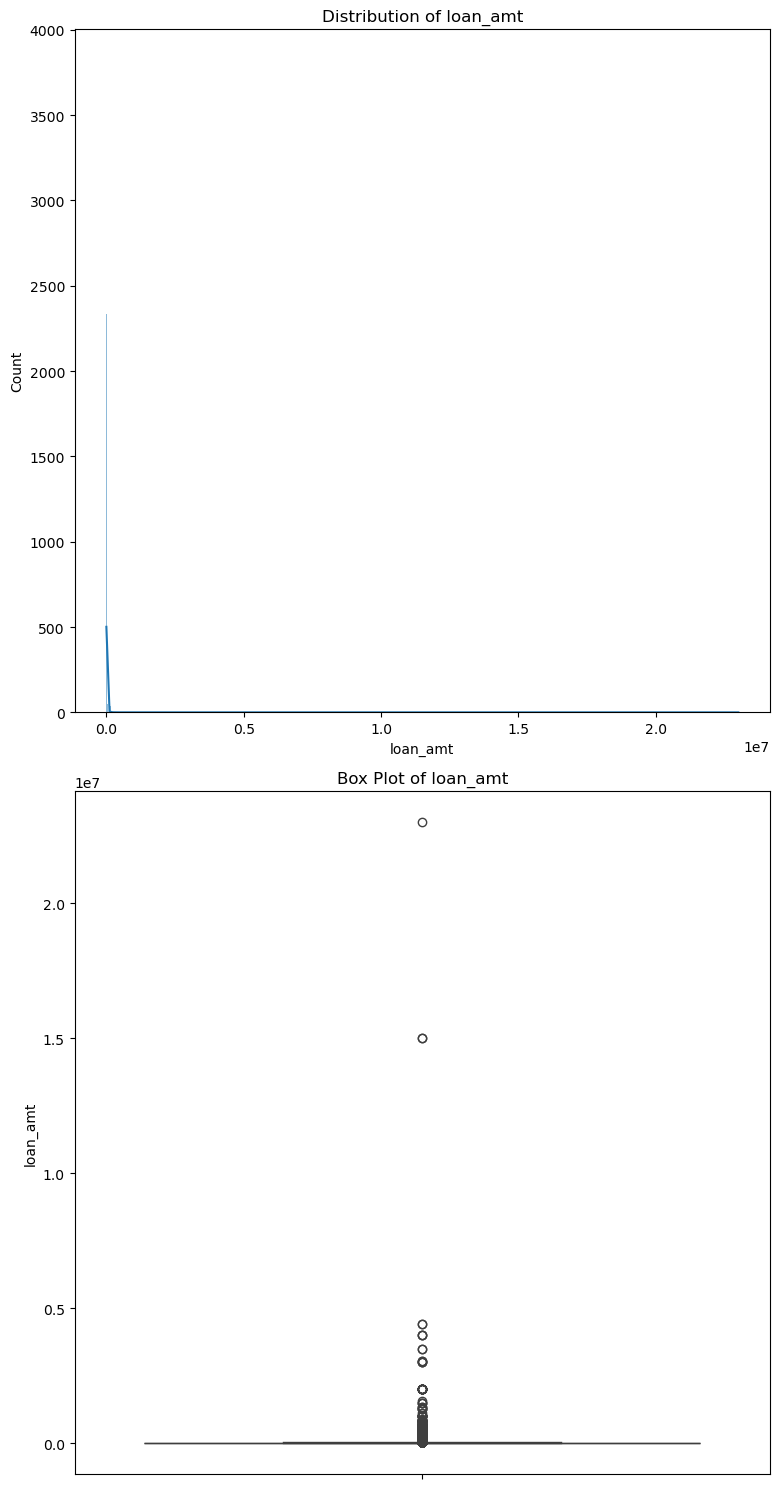

In [9]:
column = 'loan_amt'
transform = None  # Options: None, 'log', 'sqrt'

fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# Original
sns.histplot(train_df[column], kde=True, ax=axs[0, 0])
axs[0, 0].set(title=f'Distribution of {column}', xlabel=column)

sns.boxplot(y=train_df[column], ax=axs[1, 0])
axs[1, 0].set(title=f'Box Plot of {column}', ylabel=column)

# Transformation Mapping
transform_funcs = {
    'log': (np.log1p, 'Log'),
    'sqrt': (np.sqrt, 'Square Root')
}

# Apply transformation if specified
if transform in transform_funcs:
    func, label = transform_funcs[transform]
    transformed_data = func(train_df[column])

    sns.histplot(transformed_data, kde=True, ax=axs[0, 1])
    axs[0, 1].set(title=f'{label} Distribution of {column}', xlabel=f'{label}({column})')

    sns.boxplot(y=transformed_data, ax=axs[1, 1])
    axs[1, 1].set(title=f'{label} Box Plot of {column}', ylabel=f'{label}({column})')
else:
    axs[0, 1].remove()
    axs[1, 1].remove()

plt.tight_layout()
plt.show()

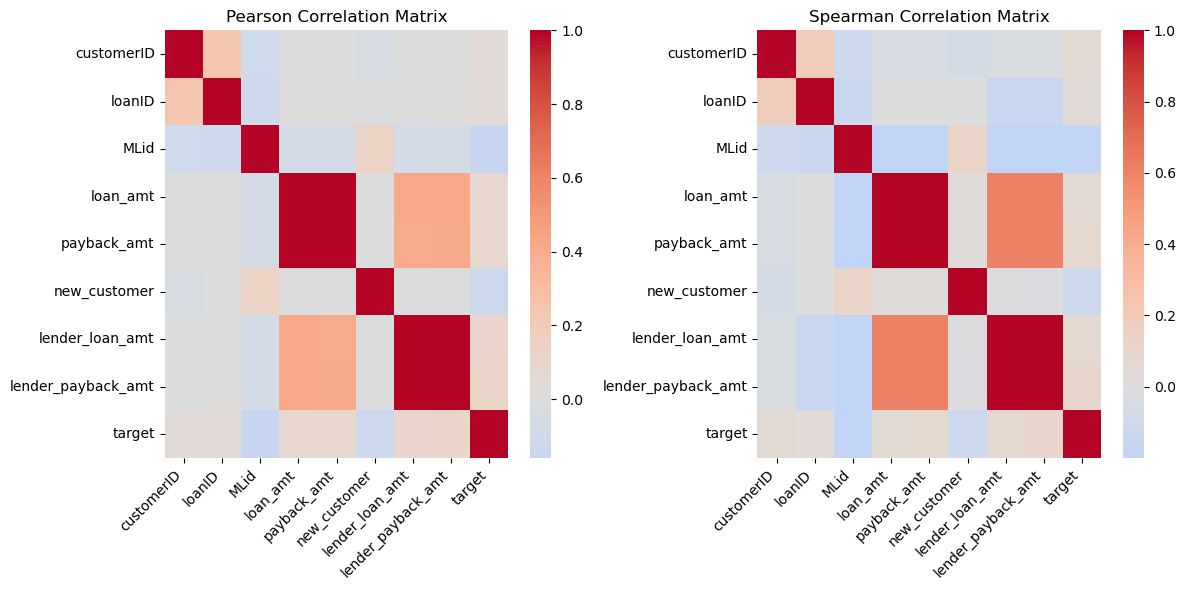

In [10]:
numeric_df = train_df.select_dtypes(include=['number'])

correlations = {
    'Pearson': numeric_df.corr(method='pearson'),   # Linear relationships
    'Spearman': numeric_df.corr(method='spearman'), # Monotonic relationships
}

# Plot each correlation matrix
plt.figure(figsize=(18, 6))
for i, (method, corr_matrix) in enumerate(correlations.items(), start=1):
    plt.subplot(1, 3, i)
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, cbar=True)
    plt.title(f'{method} Correlation Matrix')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [11]:
data = pd.concat([train_df, test_df]).reset_index(drop=True)

# Convert date columns to datetime
data['loan_release_date'] = pd.to_datetime(data['loan_release_date'], errors='coerce')
data['loan_due_date'] = pd.to_datetime(data['loan_due_date'], errors='coerce')

# Extract date components
date_cols = ['loan_release_date', 'loan_due_date']
for col in date_cols:
    data[col + '_month'] = data[col].dt.month
    data[col + '_day'] = data[col].dt.day
    data[col + '_year'] = data[col].dt.year

# Loan Duration & Weekday
data['loan_term_days'] = (data['loan_due_date'] - data['loan_release_date']).dt.days
data['release_weekday'] = data['loan_release_date'].dt.weekday
data['due_weekday'] = data['loan_due_date'].dt.weekday

# Fic missing or zero
data.loc[data['payback_amt'] == 0, 'payback_amt'] += data['lender_payback_amt']

# payback stats per customer
aggregates = data.groupby('customerID')['payback_amt'].agg(['mean', 'median']).reset_index()
aggregates.rename(columns={'mean': 'Mean_Payback_Amt', 'median': 'Median_Payback_Amt'}, inplace=True)
data = data.merge(aggregates, on='customerID', how='left')

# Financial ratios and Log Transformations
data['repayment_ratio'] = data['payback_amt'] / data['loan_amt']
data['log_loan_amt'] = np.log1p(data['loan_amt'])
data['log_payback_amt'] = np.log1p(data['payback_amt'])
data['log_lender_loan_amt'] = np.log1p(data['lender_loan_amt'])
data['log_lender_payback_amt'] = np.log1p(data['lender_payback_amt'])

# Outlier treatment
q = 0.9
data['payback_amt'] = np.where(data['payback_amt'] >= data['payback_amt'].quantile(q),
                               data['payback_amt'].quantile(q),
                               data['payback_amt'])
data['loan_amt'] = np.where(data['loan_amt'] >= data['loan_amt'].quantile(q),
                            data['loan_amt'].quantile(q),
                            data['loan_amt'])

# Borrowing history (I ranked them)
data['date'] = data['loan_release_date'].astype(str).str.replace("-", "").astype(int)
data['order'] = data.groupby('customerID')['date'].rank(method='dense', ascending=True).astype(int)

# Maping unique customer and loan IDs
data['customerID'] = data['customerID'].astype('category').cat.codes + 1
data['loanID'] = data['loanID'].astype('category').cat.codes + 1
data['MLid'] = data['MLid'].astype('category').cat.codes + 1

# Encoidng Categorical Loan Type
le = LabelEncoder()
data['loan_category'] = le.fit_transform(data['loan_category'])

# Drop unused columns
cols_to_drop = ['loan_release_date_year', 'loan_due_date_year', 'date']
for col in cols_to_drop:
    if col in data.columns:
        data = data.drop(columns=[col])

# Split back
train = data[data['processID'].isin(train_df['processID'].unique())].fillna(0)
test = data[data['processID'].isin(test_df['processID'].unique())].fillna(0)

# Features for Modelling
features_for_modelling = [col for col in train.columns if col not in date_cols + ['processID', 'target']]

print(f"The shape of train is: {train_df.shape}")
print(f"The shape of processed train is: {train.shape}")
print(f"The shape of test is: {test_df.shape}")
print(f"The shape of processed test is: {test.shape}")
print("The features for modelling are:")
print(features_for_modelling)

The shape of train is: (54923, 13)
The shape of processed train is: (54923, 28)
The shape of test is: (13731, 12)
The shape of processed test is: (13731, 28)
The features for modelling are:
['customerID', 'loanID', 'MLid', 'loan_category', 'loan_amt', 'payback_amt', 'new_customer', 'lender_loan_amt', 'lender_payback_amt', 'loan_release_date_month', 'loan_release_date_day', 'loan_due_date_month', 'loan_due_date_day', 'loan_term_days', 'release_weekday', 'due_weekday', 'Mean_Payback_Amt', 'Median_Payback_Amt', 'repayment_ratio', 'log_loan_amt', 'log_payback_amt', 'log_lender_loan_amt', 'log_lender_payback_amt', 'order']


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54923 entries, 0 to 54922
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   processID                54923 non-null  object        
 1   customerID               54923 non-null  int16         
 2   loanID                   54923 non-null  int32         
 3   MLid                     54923 non-null  int8          
 4   loan_category            54923 non-null  int64         
 5   loan_amt                 54923 non-null  float64       
 6   payback_amt              54923 non-null  float64       
 7   loan_release_date        54923 non-null  datetime64[ns]
 8   loan_due_date            54923 non-null  datetime64[ns]
 9   new_customer             54923 non-null  int64         
 10  lender_loan_amt          54923 non-null  float64       
 11  lender_payback_amt       54923 non-null  int64         
 12  target                   54923 non-nu

In [13]:
display("Train New", train.head(), train.shape)

'Train New'

,processID,customerID,loanID,MLid,loan_category,loan_amt,payback_amt,loan_release_date,loan_due_date,new_customer,...,release_weekday,due_weekday,Mean_Payback_Amt,Median_Payback_Amt,repayment_ratio,log_loan_amt,log_payback_amt,log_lender_loan_amt,log_lender_payback_amt,order
0,PID_372255238161278515,3822,11336,4,0,2849.0,2849.0,2022-07-28,2022-08-04,1,...,3,3,4857.969697,4742.00,1.000000,7.955074,7.955074,6.751920,6.75227,7
1,PID_375998298687278515,4487,51557,4,0,2808.0,2910.0,2022-10-24,2022-10-31,1,...,0,0,1975.105263,2269.00,1.036325,7.940584,7.976252,0.000000,0.00000,13
2,PID_371612263293278515,3669,28639,4,0,11100.0,11100.0,2022-09-05,2022-09-12,1,...,0,0,5936.086957,5249.00,1.000000,9.314790,9.314790,0.000000,0.00000,12
3,PID_365548260790278515,2461,26993,4,0,3028.0,3029.0,2022-09-01,2022-09-08,1,...,3,3,1272.480000,1023.50,1.000330,8.015988,8.016318,0.000000,0.00000,16
4,PID_372209280232263041,3812,39676,2,9,6446.0,6543.0,2022-09-27,2022-09-30,1,...,1,4,296151.558333,54801.88,1.015048,8.771370,8.786304,7.449498,7.46451,8


(54923, 28)

In [14]:
# Stratified train-validation split
X_train, X_valid, y_train, y_valid = train_test_split(
    train[features_for_modelling], 
    train['target'], 
    stratify=train['target'], 
    shuffle=True, 
    random_state=42
)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(41192, 24) (13731, 24) (41192,) (13731,)


In [15]:
def xgb_objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 0.3),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'use_label_encoder': False,
        'eval_metric': 'logloss'
    }

    model = xgb.XGBClassifier(**params)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return f1_score(y_valid, preds)

xgb_study = optuna.create_study(direction='maximize')
xgb_study.optimize(xgb_objective, n_trials=50, show_progress_bar=True)
xgb_best_params = xgb_study.best_params
print("Best XGBoost Parameters:")
print(xgb_best_params)

[I 2025-03-23 23:25:07,944] A new study created in memory with name: no-name-df16d132-2cf7-4719-b4d2-56d8ca8c16b2


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-03-23 23:25:08,173] Trial 0 finished with value: 0.8218623481781376 and parameters: {'n_estimators': 202, 'max_depth': 3, 'learning_rate': 0.26765074869410854, 'subsample': 0.6116181354315369, 'colsample_bytree': 0.9619432460649264, 'gamma': 0.07377679384428218, 'min_child_weight': 9}. Best is trial 0 with value: 0.8218623481781376.
[I 2025-03-23 23:25:08,481] Trial 1 finished with value: 0.8640973630831643 and parameters: {'n_estimators': 251, 'max_depth': 6, 'learning_rate': 0.19852795679950372, 'subsample': 0.8786691794641137, 'colsample_bytree': 0.7742084493741931, 'gamma': 0.1289802340855991, 'min_child_weight': 9}. Best is trial 1 with value: 0.8640973630831643.
[I 2025-03-23 23:25:09,059] Trial 2 finished with value: 0.8640973630831643 and parameters: {'n_estimators': 459, 'max_depth': 9, 'learning_rate': 0.1052822228845953, 'subsample': 0.6863767135900162, 'colsample_bytree': 0.8334310806998823, 'gamma': 0.17225813362264028, 'min_child_weight': 6}. Best is trial 1 with 

In [16]:
import lightgbm as lgb
def lgb_objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.5, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.5, 1.0),
        'lambda_l1': trial.suggest_float('lambda_l1', 0.0, 1.0),
        'lambda_l2': trial.suggest_float('lambda_l2', 0.0, 1.0)
    }

    model = lgb.LGBMClassifier(**params)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return f1_score(y_valid, preds)

lgb_study = optuna.create_study(direction='maximize')
lgb_study.optimize(lgb_objective, n_trials=50, show_progress_bar=True)
lgb_best_params = lgb_study.best_params
print("Best LightGBM Parameters:")
print(lgb_best_params)

[I 2025-03-23 23:25:41,248] A new study created in memory with name: no-name-bef25715-e00e-4e07-8b54-e7987e485616


  0%|          | 0/50 [00:00<?, ?it/s]

[LightGBM] [Warning] lambda_l1 is set=0.8724042132265852, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8724042132265852
[LightGBM] [Warning] feature_fraction is set=0.5039998877387792, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5039998877387792
[LightGBM] [Warning] bagging_fraction is set=0.8860497948823862, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8860497948823862
[LightGBM] [Warning] lambda_l2 is set=0.8632655475297263, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8632655475297263
[LightGBM] [Warning] lambda_l1 is set=0.8724042132265852, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8724042132265852
[LightGBM] [Warning] feature_fraction is set=0.5039998877387792, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5039998877387792
[LightGBM] [Warning] bagging_fraction is set=0.8860497948823862, subsample=1.0 will be ignored. Current value: bagging_fraction=0.886049794882386

In [17]:
def cat_objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 600),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'verbose': 0
    }

    model = CatBoostClassifier(**params)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return f1_score(y_valid, preds)

cat_study = optuna.create_study(direction='maximize')
cat_study.optimize(cat_objective, n_trials=50, show_progress_bar=True)
cat_best_params = cat_study.best_params
print("Best CatBoost Parameters:")
print(cat_best_params)

[I 2025-03-23 23:26:50,283] A new study created in memory with name: no-name-32548731-ef82-4250-b084-61bfa65e5c51


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-03-23 23:26:57,345] Trial 0 finished with value: 0.901010101010101 and parameters: {'iterations': 404, 'depth': 9, 'learning_rate': 0.02942563633277665}. Best is trial 0 with value: 0.901010101010101.
[I 2025-03-23 23:26:59,176] Trial 1 finished with value: 0.889795918367347 and parameters: {'iterations': 277, 'depth': 4, 'learning_rate': 0.09537762577438598}. Best is trial 0 with value: 0.901010101010101.
[I 2025-03-23 23:27:00,784] Trial 2 finished with value: 0.8924949290060852 and parameters: {'iterations': 168, 'depth': 7, 'learning_rate': 0.17429328999473115}. Best is trial 0 with value: 0.901010101010101.
[I 2025-03-23 23:27:03,848] Trial 3 finished with value: 0.8983739837398373 and parameters: {'iterations': 112, 'depth': 10, 'learning_rate': 0.1579511114161123}. Best is trial 0 with value: 0.901010101010101.
[I 2025-03-23 23:27:04,994] Trial 4 finished with value: 0.9042769857433809 and parameters: {'iterations': 160, 'depth': 5, 'learning_rate': 0.12185599045728589}.

In [18]:
X = train[features_for_modelling]
y = train['target']

🔍 Evaluation for XGBoost
F1 Score: 0.8929

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13479
         1.0       0.91      0.88      0.89       252

    accuracy                           1.00     13731
   macro avg       0.95      0.94      0.95     13731
weighted avg       1.00      1.00      1.00     13731



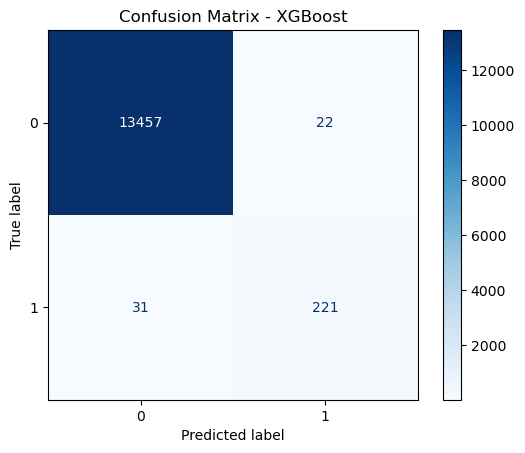

------------------------------------------------------------
[LightGBM] [Warning] lambda_l1 is set=0.4425280171154381, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.4425280171154381
[LightGBM] [Warning] feature_fraction is set=0.7836019857002764, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7836019857002764
[LightGBM] [Warning] bagging_fraction is set=0.7163261517618268, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7163261517618268
[LightGBM] [Warning] lambda_l2 is set=0.4033211551703575, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4033211551703575
[LightGBM] [Warning] lambda_l1 is set=0.4425280171154381, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.4425280171154381
[LightGBM] [Warning] feature_fraction is set=0.7836019857002764, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7836019857002764
[LightGBM] [Warning] bagging_fraction is set=0.7163261517618268, subsample=1.0 will 

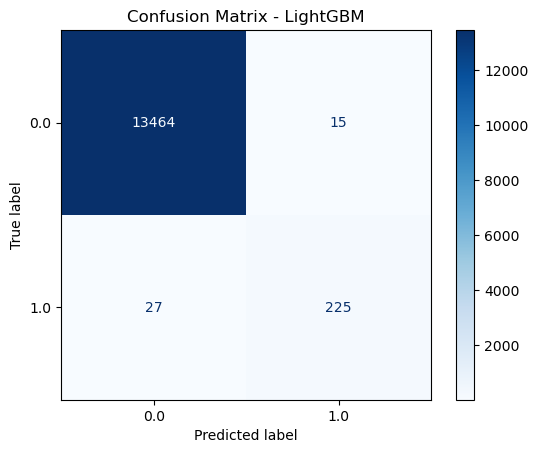

------------------------------------------------------------
🔍 Evaluation for CatBoost
F1 Score: 0.9124

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13479
         1.0       0.92      0.91      0.91       252

    accuracy                           1.00     13731
   macro avg       0.96      0.95      0.96     13731
weighted avg       1.00      1.00      1.00     13731



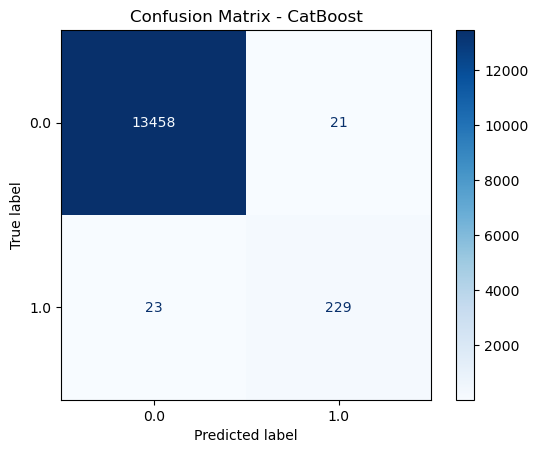

------------------------------------------------------------


In [19]:
def train_and_evaluate(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)

    print(f"🔍 Evaluation for {model_name}")
    print(f"F1 Score: {f1_score(y_valid, y_pred):.4f}")
    print("\nClassification Report:\n", classification_report(y_valid, y_pred))

    ConfusionMatrixDisplay.from_predictions(
        y_valid,
        y_pred,
        display_labels=model.classes_,
        cmap=plt.cm.Blues
    )
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()
    print("-" * 60)

# Train & evaluate each model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', **xgb_best_params)
train_and_evaluate(xgb_model, "XGBoost")

lgb_model = lgb.LGBMClassifier(**lgb_best_params)
train_and_evaluate(lgb_model, "LightGBM")

cat_model = CatBoostClassifier(verbose=0, **cat_best_params)
train_and_evaluate(cat_model, "CatBoost")

In [20]:
final_model = lgb.LGBMClassifier(**lgb_best_params)
final_model.fit(X, y)  # Train on all data

[LightGBM] [Warning] lambda_l1 is set=0.4425280171154381, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.4425280171154381
[LightGBM] [Warning] feature_fraction is set=0.7836019857002764, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7836019857002764
[LightGBM] [Warning] bagging_fraction is set=0.7163261517618268, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7163261517618268
[LightGBM] [Warning] lambda_l2 is set=0.4033211551703575, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4033211551703575
[LightGBM] [Warning] lambda_l1 is set=0.4425280171154381, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.4425280171154381
[LightGBM] [Warning] feature_fraction is set=0.7836019857002764, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7836019857002764
[LightGBM] [Warning] bagging_fraction is set=0.7163261517618268, subsample=1.0 will be ignored. Current value: bagging_fraction=0.716326151761826

LGBMClassifier(bagging_fraction=0.7163261517618268,
               feature_fraction=0.7836019857002764,
               lambda_l1=0.4425280171154381, lambda_l2=0.4033211551703575,
               learning_rate=0.07911597525582285, max_depth=9, n_estimators=305,
               num_leaves=77)

In [21]:
X_test = test[features_for_modelling]
test_preds = final_model.predict(X_test)

[LightGBM] [Warning] lambda_l1 is set=0.4425280171154381, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.4425280171154381
[LightGBM] [Warning] feature_fraction is set=0.7836019857002764, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7836019857002764
[LightGBM] [Warning] bagging_fraction is set=0.7163261517618268, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7163261517618268
[LightGBM] [Warning] lambda_l2 is set=0.4033211551703575, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4033211551703575


In [22]:

models = {
    "xgb": xgb_model,
    "lgbm": lgb_model,
    "catboost": cat_model
}

best_threshold = 0.5

for name, model in models.items():
    probs = model.predict_proba(X_test)[:, 1]
    
    # threshold
    preds = (probs > best_threshold).astype(int)
    
    submission = test_df[['processID']].copy()
    submission.columns = ['ID']               
    submission['TARGET'] = preds             


    # Save to CSV
    file_name = f"pred7_{name}.csv"
    submission.to_csv(file_name, index=False)
    print(f"Saved {file_name} with shape {submission.shape}")


Saved pred7_xgb.csv with shape (13731, 2)
[LightGBM] [Warning] lambda_l1 is set=0.4425280171154381, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.4425280171154381
[LightGBM] [Warning] feature_fraction is set=0.7836019857002764, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7836019857002764
[LightGBM] [Warning] bagging_fraction is set=0.7163261517618268, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7163261517618268
[LightGBM] [Warning] lambda_l2 is set=0.4033211551703575, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4033211551703575
Saved pred7_lgbm.csv with shape (13731, 2)
Saved pred7_catboost.csv with shape (13731, 2)


In [ ]:
# I uploaded all of them and got the best result from lightgbm.